# Loaading and Preprocessing

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D


2024-07-14 19:11:54.446645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 19:11:54.446770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 19:11:54.616509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_path = '/kaggle/input/jsrt-subsetautoenc/JSRT Subset (Autoencoders)'
normal_path = os.path.join(base_path, 'normal')
normal200_path = os.path.join(base_path, 'normal200')

In [3]:
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".bmp"):  # Assuming the images are in .png format
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, color_mode='grayscale')
            img = img_to_array(img)
            images.append(img)
    return np.array(images)

normal_images = load_images_from_directory(normal_path)
normal200_images = load_images_from_directory(normal200_path)

In [4]:
normal_images = normal_images / 255.0
normal200_images = normal200_images / 255.0

In [5]:
all_images = np.concatenate((normal_images, normal200_images), axis=0)
x_train, x_test = train_test_split(all_images, test_size=0.2, random_state=42)

**Example Images**

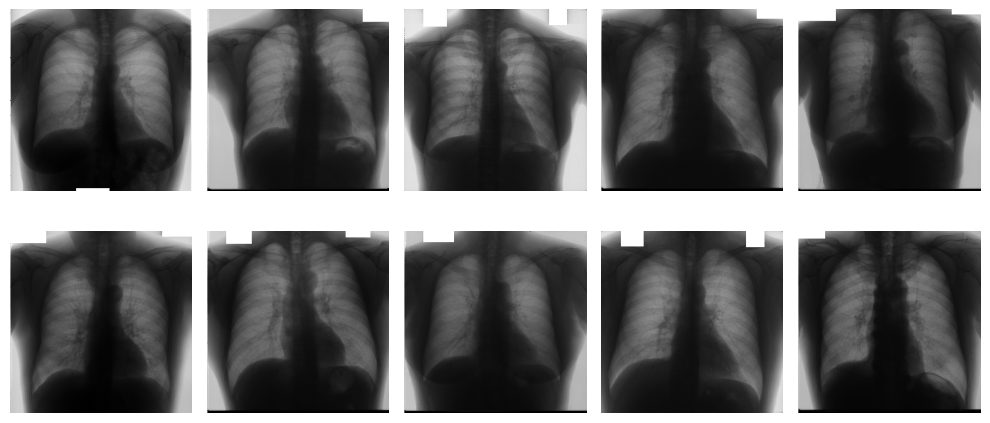

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(256, 256), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Autoencoder Model

In [7]:
input_img = Input(shape=(256, 256, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/50
2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.6943 

I0000 00:00:1720984358.923846     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - loss: 0.6848 - val_loss: 0.6500
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.6455 - val_loss: 0.6178
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.5966 - val_loss: 0.5298
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4973 - val_loss: 0.5063
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4827 - val_loss: 0.4931
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4759 - val_loss: 0.4890
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4747 - val_loss: 0.4909
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4696 - val_loss: 0.4864
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4673 - val_loss: 0.4843
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4686 - val_loss: 0.4833
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4667 - val_loss: 0.4824
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.4663 - val_loss: 0.4814
Epoch 13/50
6

In [9]:
decoded_imgs = autoencoder.predict(x_test)

# loss
reconstruction_loss = np.mean(np.abs(decoded_imgs - x_test), axis=(1, 2, 3))

# threshold for anomaly detection
threshold = np.percentile(reconstruction_loss, 95)  # 95th percentile

anomalies = reconstruction_loss > threshold


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step  


# Anomaly Detection

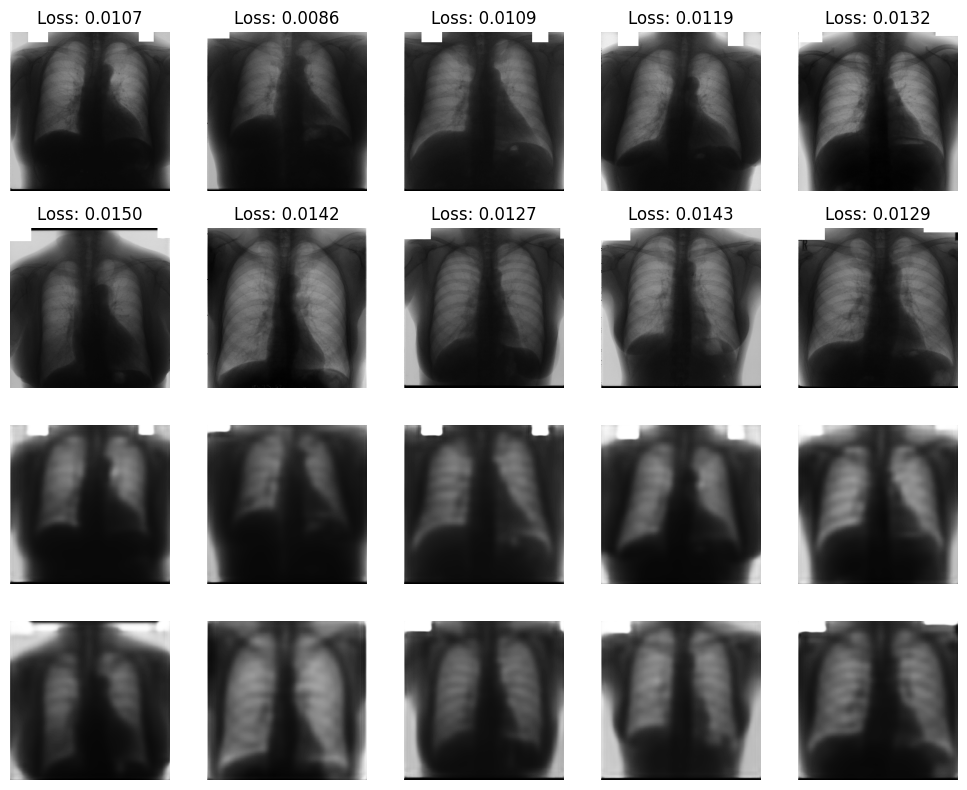

In [10]:
# Original and reconstructed images with their reconstruction loss
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i].reshape(256, 256), cmap='gray')
    plt.title(f"Loss: {reconstruction_loss[i]:.4f}")
    plt.axis('off')

    plt.subplot(4, 5, i+11)
    plt.imshow(decoded_imgs[i].reshape(256, 256), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Number of detected anomalies
print(f"Number of detected anomalies: {np.sum(anomalies)}")

Number of detected anomalies: 3
